# Requirements

In [1]:
import pandas as pd

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **close price** of the Dow Jones Industrial Average index. To accomplish this use data from the past 7 days, which includes numeric information and news information. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast one future step for the index price (the following day).


## The DIJA Dataset

This dataset consists of daily price records for the value of the Dow Jones Industrial Average index. The dataset includes the following attributes:

- Date - date in the format YYYY-MM-DD,
- Open - open price of the index on the specified date
- Close - close price of the index on the specified date
- High - high price of the index on the specified date
- Low - low price of the index on the specified date
- Volume - number of trades



## The Reddit News Dataset

This dataset consists of news headlines for a certain date that might impact the price:

- Date - date in the format YYYY-MM-DD,
- News - news headline scraped from Reddit

<b>Note: You might have multiple headlines for each date. The number of news per date might not be the same for each date. <b>

Load the datasets into a `pandas` data frame.

In [5]:
djia_df = pd.read_csv('C:/Users/kosta/OneDrive/Desktop/marija/DJIA_table.csv')
news_df = pd.read_csv('C:/Users/kosta/OneDrive/Desktop/marija/RedditNews.csv')

Merge the datasets (be careful you can get multiple rows per date which is not desirable)

In [6]:
djia_df.head()

,Date,Open,High,Low,Close,Volume
0,7/1/2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000
1,6/30/2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000
2,6/29/2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000
3,6/28/2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000
4,6/27/2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000


In [7]:
news_df.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [12]:
dija_df['Date'] = pd.to_datetime(dija_df['Date'])
news_df_agg['Date'] = pd.to_datetime(news_df_agg['Date'])
merged_df = pd.merge(dija_df, news_df_agg, on='Date', how='left')


## Feauture Extraction


1. DIJA Table
Apply a lag of one, up to 7 days to each feature, creating a set of features representing the index price from the previous 7 days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

2. Reddit News Table
Create a numeric representation for the news (for example average embedding or average sentiment). <b> You must create lags of the news features as well since we will not know the news for the future. </b>

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [13]:
for i in range(1, 8):
    merged_df[f'Close_lag_{i}'] = merged_df['Close'].shift(i)
    merged_df[f'Open_lag_{i}'] = merged_df['Open'].shift(i)
    merged_df[f'High_lag_{i}'] = merged_df['High'].shift(i)
    merged_df[f'Low_lag_{i}'] = merged_df['Low'].shift(i)
    merged_df[f'Volume_lag_{i}'] = merged_df['Volume'].shift(i)

In [15]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 26.5 MB/s eta 0:00:00


In [16]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

merged_df['News_sentiment'] = merged_df['News'].apply(get_sentiment)

for i in range(1, 8):
    merged_df[f'News_sentiment_lag_{i}'] = merged_df['News_sentiment'].shift(i)

In [17]:
merged_df

,Date,Open,High,Low,Close,Volume,News,Close_lag_1,Open_lag_1,High_lag_1,...,Low_lag_7,Volume_lag_7,News_sentiment,News_sentiment_lag_1,News_sentiment_lag_2,News_sentiment_lag_3,News_sentiment_lag_4,News_sentiment_lag_5,News_sentiment_lag_6,News_sentiment_lag_7
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,A 117-year-old woman in Mexico City finally re...,NaN,NaN,NaN,...,NaN,NaN,-0.035458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,Jamaica proposes marijuana dispensers for tour...,17949.36914,17924.24023,18002.38086,...,NaN,NaN,0.011243,-0.035458,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,Explosion At Airport In Istanbul Yemeni former...,17929.99023,17712.75977,17930.60938,...,NaN,NaN,0.052622,0.011243,-0.035458,NaN,NaN,NaN,NaN,NaN
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,"2,500 Scientists To Australia: If You Want To ...",17694.67969,17456.01953,17704.50977,...,NaN,NaN,0.046560,0.052622,0.011243,-0.035458,NaN,NaN,NaN,NaN
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,Barclays and RBS shares suspended from trading...,17409.72070,17190.50977,17409.72070,...,NaN,NaN,-0.014015,0.046560,0.052622,0.011243,-0.035458,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,b'All the experts admit that we should legalis...,11659.90039,11611.20996,11709.88965,...,11362.62988,148610000.0,0.040677,0.047756,0.016759,-0.025814,0.038384,0.049074,0.080114,-0.083212
1985,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,b' U.S. refuses Israel weapons to attack Iran:...,11615.92969,11532.07031,11718.28027,...,11426.79004,138790000.0,0.011398,0.040677,0.047756,0.016759,-0.025814,0.038384,0.049074,0.080114
1986,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,b'Remember that adorable 9-year-old who sang a...,11532.95996,11632.80957,11633.78027,...,11315.57031,130020000.0,-0.046530,0.011398,0.040677,0.047756,0.016759,-0.025814,0.038384,0.049074
1987,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,b'Why wont America and Nato help us? If they w...,11642.46973,11781.70020,11782.34961,...,11290.58008,144880000.0,0.121956,-0.046530,0.011398,0.040677,0.047756,0.016759,-0.025814,0.038384


In [18]:
merged_df = merged_df.dropna()

In [19]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,News,Close_lag_1,Open_lag_1,High_lag_1,...,Low_lag_7,Volume_lag_7,News_sentiment,News_sentiment_lag_1,News_sentiment_lag_2,News_sentiment_lag_3,News_sentiment_lag_4,News_sentiment_lag_5,News_sentiment_lag_6,News_sentiment_lag_7
7,2016-06-22,17832.66992,17920.16016,17770.35938,17780.83008,89440000,German government agrees to ban fracking indef...,18011.07031,17844.10938,18011.07031,...,17916.91016,82160000.0,0.006428,0.086216,0.037381,-0.014015,0.046560,0.052622,0.011243,-0.035458
8,2016-06-21,17827.33008,17877.83984,17799.80078,17829.73047,85130000,An Australian athlete who has competed in six ...,17780.83008,17832.66992,17920.16016,...,17711.80078,133030000.0,0.072323,0.006428,0.086216,0.037381,-0.014015,0.046560,0.052622,0.011243
9,2016-06-20,17736.86914,17946.35938,17736.86914,17804.86914,99380000,A staggering 87 percent of Venezuelans say the...,17829.73047,17827.33008,17877.83984,...,17456.01953,106380000.0,0.046463,0.072323,0.006428,0.086216,0.037381,-0.014015,0.046560,0.052622
10,2016-06-17,17733.43945,17733.43945,17602.77930,17675.16016,248680000,MP Jo Cox dead after shooting attack Saudi Ara...,17804.86914,17736.86914,17946.35938,...,17190.50977,112190000.0,-0.034244,0.046463,0.072323,0.006428,0.086216,0.037381,-0.014015,0.046560
11,2016-06-16,17602.23047,17754.91016,17471.28906,17733.09961,91950000,Decriminalisation Call As 'War On Drugs' Fails...,17675.16016,17733.43945,17733.43945,...,17063.08008,138740000.0,0.064877,-0.034244,0.046463,0.072323,0.006428,0.086216,0.037381,-0.014015


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [20]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['Date', 'Close', 'News'])
y = merged_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler if needed.

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [23]:
import numpy as np

def reshape_data(data, timesteps=7):
    X, y = [], []
    for i in range(timesteps, len(data)):
        X.append(data[i-timesteps:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = reshape_data(X_train_scaled)
X_test, y_test = reshape_data(X_test_scaled)

## Long Short-Term Memory (LSTM) Network


Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\kosta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0012 - loss: 0.2356 - val_accuracy: 0.0032 - val_loss: 0.0017
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0012 - loss: 0.0766 - val_accuracy: 0.0032 - val_loss: 0.0015
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0012 - loss: 0.0787 - val_accuracy: 0.0032 - val_loss: 0.0023
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0012 - loss: 0.1095 - val_accuracy: 0.0032 - val_loss: 0.0029
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0012 - loss: 0.0950 - val_accuracy: 0.0032 - val_loss: 0.0046
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0012 - loss: 0.0796 - val_accuracy: 0.0032 - val_loss: 0.0030
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0012 - loss: 0.0684 - val_accuracy: 0.0032 - val_loss: 0.0045
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0012 - loss: 0.0469 - val_accuracy: 0.0032 - val_loss

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

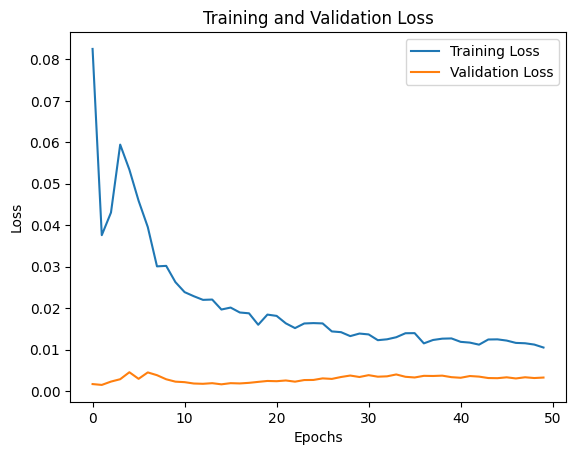

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Use the trained model to make predictions for the test set.

In [31]:
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 0.2172887689132321
MAE: 0.18784431787291195
R²: -1.5688750754150371


Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.